# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [18]:
data = load_iris()
x = data.data
y = data.target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
df_x = pd.DataFrame(x,columns=data.feature_names)
df_x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667


## train set, test set 구분하기

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = \
    train_test_split(df_x,y,test_size=0.3,random_state=1)

## **sepal끼리, petal끼리**

In [20]:
tr1 = x_train.loc[:,['sepal length (cm)', 'petal length (cm)']]
tr2 = x_train.loc[:,['sepal width (cm)', 'petal width (cm)']]
te1 = x_test.loc[:,['sepal length (cm)', 'petal length (cm)']]
te2 = x_test.loc[:,['sepal width (cm)', 'petal width (cm)']]

In [23]:
tr1.shape, tr2.shape

((105, 2), (105, 2))

## One-hot Encoding

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

## Modeling : multi-input & Add layer

In [29]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.utils import plot_model

In [25]:
#### modeling ####
# clear session
keras.backend.clear_session()
# layer set
il1 = Input(shape=2)
hl1 = Dense(64,activation=relu)(il1)
hl1 = Dense(64,activation=relu)(hl1)
hl1 = Dense(32,activation=relu)(hl1)

il2 = Input(shape=2)
hl2 = Dense(64,activation=relu)(il2)
hl2 = Dense(64,activation=relu)(hl2)
hl2 = Dense(32,activation=relu)(hl2)


al = keras.layers.Add()([hl1,hl2])
ol = Dense(3,activation=softmax)(al)

# model set
model = keras.models.Model([il1,il2],ol)

# compile
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

# summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 64)           192         ['input_2[0][0]']                
                                                                                              

## 모델 시각화

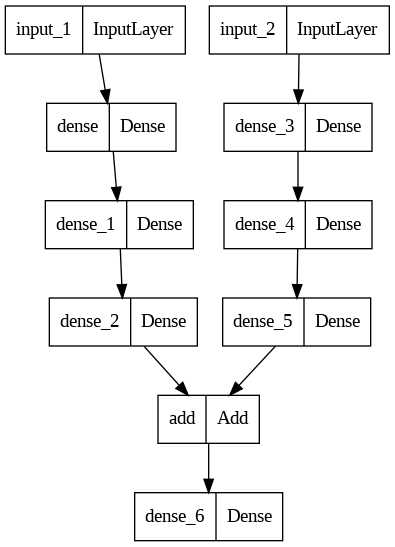

In [30]:
plot_model(model)

## 학습 시켜보기!

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,
                   patience=10,restore_best_weights=True)

In [34]:
model.fit([tr1,tr2],y_train,validation_split=0.3,epochs=1000,callbacks=[es])

Epoch 1/1000
3/3 [==============================] - 3s 483ms/step - loss: 1.1290 - acc: 0.3562 - val_loss: 1.0945 - val_acc: 0.3125
Epoch 2/1000
3/3 [==============================] - 0s 29ms/step - loss: 1.0748 - acc: 0.3836 - val_loss: 1.0739 - val_acc: 0.5938
Epoch 3/1000
3/3 [==============================] - 0s 60ms/step - loss: 1.0441 - acc: 0.7260 - val_loss: 1.0592 - val_acc: 0.5938
Epoch 4/1000
3/3 [==============================] - 0s 41ms/step - loss: 1.0155 - acc: 0.7397 - val_loss: 1.0461 - val_acc: 0.5938
Epoch 5/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.9919 - acc: 0.7397 - val_loss: 1.0361 - val_acc: 0.5938
Epoch 6/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.9709 - acc: 0.7397 - val_loss: 1.0250 - val_acc: 0.5938
Epoch 7/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.9466 - acc: 0.7397 - val_loss: 1.0113 - val_acc: 0.5938
Epoch 8/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.9234 - 

In [35]:
y_pred = model.predict([te1,te2])

2/2 [==============================] - 0s 6ms/step


In [37]:
y_pred.argmax(axis=1),y_test.argmax(axis=1)

(array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
        1]),
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
        1]))

In [38]:
y_pred.argmax(axis=1)==y_test.argmax(axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])